In [54]:
import pandas as pd
import matplotlib as plt
import sklearn
import numpy as np

## Import data

In [58]:
data = "../data/mushrooms.csv"
df = pd.read_csv(data)

In [59]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Fix missing data

In [61]:
for col in df.columns:
    if df[col].isin(["?"]).any():
        print(col, df[col].value_counts())

stalk-root b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64


In [62]:
df = df.drop(columns=["stalk-root"])

## Recode data

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

In [63]:
from sklearn.preprocessing import LabelEncoder

target_enc = LabelEncoder()
target_enc.fit(df["class"])
print(target_enc.classes_)
df["class"] = target_enc.transform(df["class"])

['e' 'p']


In [64]:
df["class"]

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [81]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["class"]).values
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # use a validation set as third set if you do not or cannot want to use cross-validation!

In [82]:
len(X_train), len(X_test)

(6093, 2031)

In [83]:
X_train.shape

(6093, 21)

In [84]:
from sklearn.preprocessing import OneHotEncoder

drop_binary_enc = OneHotEncoder(drop='if_binary', handle_unknown="ignore", sparse=False).fit(X_train)  # use sparse for bigger data!
X_train = drop_binary_enc.transform(X_train)
X_test = drop_binary_enc.transform(X_test)

In [85]:
X_train, X_train.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 1., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 (6093, 107))

## Building the models

### Logistic Regression

$$ \min_{w,c} \cfrac{1}{2}w^Tw + C \sum_{i=1}^n \log\left(\exp\left(-y_i\left(X_i^Tw+c\right)\right)+1\right) $$

In [132]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    penalty="l2", 
    dual=False,
    tol=1e-4,
    C=1,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight=None,
    random_state=42,
    solver="lbfgs",
    max_iter=100,
    multi_class="auto",
    verbose=0,
    warm_start=False,
    n_jobs=None,
    l1_ratio=None
)

In [133]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)

In [134]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


In [136]:
# use other scorings: https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
scores = cross_val_score(model, X_train, y_train, cv=10, scoring="f1")

In [137]:
print("%0.2f f1 score with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 f1 score with a standard deviation of 0.00


In [140]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("predictions:", model.predict(X_test[:10]))

print("probabilities:", np.round(model.predict_proba(X_test[:10]), 2))

predictions: [0 1 1 0 1 1 1 1 0 0]
probabilities: [[1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.03 0.97]
 [0.   1.  ]
 [1.   0.  ]
 [1.   0.  ]]


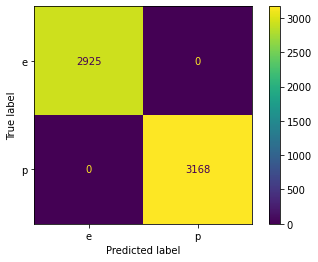

In [141]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

y_pred = model.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_enc.classes_)

disp.plot()
None

### Naive Bayes

$$ P(y | x_1, \ldots{}, x_n) = \cfrac{P(y)P(x_1, \ldots{}, x_n | y)}{P(x_1, \ldots{}, x_n)} $$

$$ P(y | x_1, \ldots{}, x_n) = \cfrac{P(y) \prod_{i=1}^n P(x_i | y)}{P(x_1, \ldots{}, x_n)} $$

$$ P(y | x_1, \ldots{}, x_n) \propto P(y) \prod_{i=1}^n P(x_i | y) $$

$$ \hat{y} = \arg \max_y P(y | x_1, \ldots{}, x_n) \propto P(y) \prod_{i=1}^n P(x_i | y) $$


In [142]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(
    alpha=1,
    fit_prior=True,
    class_prior=None
)

In [143]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=10)

In [144]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.96 accuracy with a standard deviation of 0.01


In [145]:
model = MultinomialNB()
model.fit(X_train, y_train)

print("predictions:", model.predict(X_test[:10]))

print("probabilities:", np.round(model.predict_proba(X_test[:10]), 2))

predictions: [0 1 1 0 1 1 1 1 0 0]
probabilities: [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


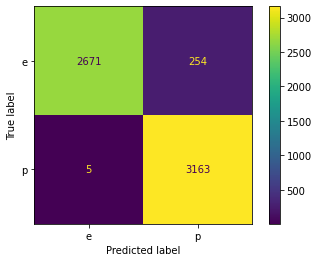

In [146]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

y_pred = model.predict(X_train)

cm = confusion_matrix(y_train, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_enc.classes_)

disp.plot()
None